In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
def equivalent_error_rate(q1, err, q2, n=500):
    cdf = st.binom.cdf(err * n, n, q1)
    return st.binom.ppf(cdf, n, q2) / n

def equivalent_success_rate(p1, success, p2, n=500):
    return 1 - equivalent_error_rate(1 - p1, 1 - success, 1 - p2, n=500)

In [76]:
def load_many(fnames_list):
    data_list = []
    for f in fnames_list:
        if not isinstance(f, str):
            data_list.append(load_many(f))
        else:
            data_list.append(pd.read_csv(f))
    return data_list

def average_dfs(data_lists):
    print(f"averaging over {len(data_lists)} training curves")
    avg_list = []
    for df_group in zip(*data_lists):
        maxlen = max(map(lambda df: df.shape[0], df_group))
        avg_list.append(sum(map(lambda df: df.head(maxlen), df_group))/len(df_group))
    return avg_list

def plot_many(data_list, desc_list, field, goal=None, smooth_window=1):
    ax = plt.axes()
    for f, d in zip(data_list, desc_list):
        df = pd.read_csv(f)
        episodes = df["episode"]
        curve = df[field]
        smooth_curve = curve.rolling(window=smooth_window).mean()
        ax.plot(episodes, smooth_curve, label=d)
    if goal:
        ax.plot(episodes, np.ones_like(episodes)*goal, color='black', linestyle='dotted')
    ax.legend(loc="best")

def only_plot(data_list, desc_list, field, goal=None, smooth_window=1):
    ax = plt.axes()
    for df, d in zip(data_list, desc_list):
        episodes = df["episode"]
        curve = df[field]
        smooth_curve = curve.rolling(window=smooth_window).mean()
        ax.plot(episodes, smooth_curve, label=d)
    if goal:
        ax.plot(episodes, np.ones_like(episodes)*goal, color='black', linestyle='dotted')
    ax.legend(loc="best")

In [54]:
format_fnames = lambda y: map(lambda x: "models/local_only/{}.curves.csv".format(x.strip()), y.strip().split("\n"))

# Fixed roles

averaging over 3 training curves


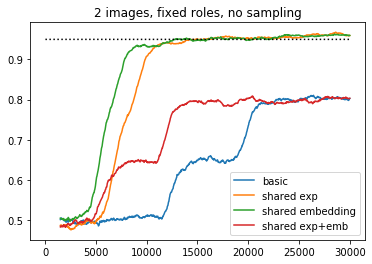

In [77]:
fnames = [
    """200908-200135-fix-2-non-50-20
200908-202048-fix-2-non-50-20
200908-204003-fix-2-non-50-20
200908-205913-fix-2-non-50-20
""", 
    """200914-090500-fix-2-non-50-20
200914-091636-fix-2-non-50-20
200914-092802-fix-2-non-50-20
200914-093924-fix-2-non-50-20
""", 
    """200914-010315-fix-2-non-50-20
200914-011456-fix-2-non-50-20
200914-012622-fix-2-non-50-20
200914-013746-fix-2-non-50-20
"""
]
fnames = map(format_fnames, fnames)
desc = ["basic", "shared exp", "shared embedding", "shared exp+emb"]
field = "batch_success"
dfs = load_many([fnames])
dfs = average_dfs(*dfs)
only_plot(dfs, desc, field, goal=0.95, smooth_window=50)
# plot_many(fnames, desc, field, goal=0.95, smooth_window=50)
plt.title("2 images, fixed roles, no sampling");

averaging over 3 training curves


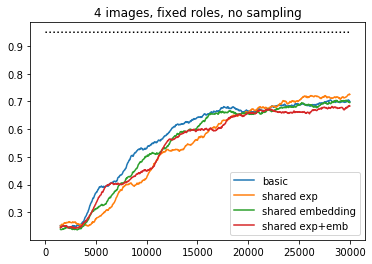

In [79]:
fnames = [
    """200914-121529-fix-4-non-50-20
200914-122800-fix-4-non-50-20
200914-124052-fix-4-non-50-20
200914-125319-fix-4-non-50-20
""",
    """200914-040929-fix-4-non-50-20
200914-042143-fix-4-non-50-20
200914-043417-fix-4-non-50-20
200914-044626-fix-4-non-50-20
""",
    """200909-011613-fix-4-non-50-20
200909-013642-fix-4-non-50-20
200909-015921-fix-4-non-50-20
200909-022011-fix-4-non-50-20
"""
]
fnames = list(map(format_fnames, fnames))
desc = ["basic", "shared exp", "shared embedding", "shared exp+emb"]
field = "batch_success"
goal = equivalent_success_rate(1/2, 0.95, 1/4)
dfs = average_dfs(*load_many([fnames]))
only_plot(dfs, desc, field, goal=0.95, smooth_window=50)
plt.title("4 images, fixed roles, no sampling");

averaging over 3 training curves


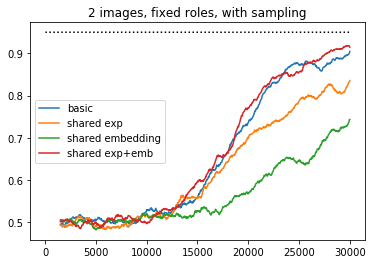

In [80]:
fnames = [
    """200914-095051-fix-2-gib-50-20
200914-100224-fix-2-gib-50-20
200914-101406-fix-2-gib-50-20
200914-102611-fix-2-gib-50-20
""",
    """200914-014914-fix-2-gib-50-20
200914-020048-fix-2-gib-50-20
200914-021227-fix-2-gib-50-20
200914-022405-fix-2-gib-50-20
""",
    """200908-211838-fix-2-gib-50-20
200908-213823-fix-2-gib-50-20
200908-215807-fix-2-gib-50-20
200908-221745-fix-2-gib-50-20
"""
]     
desc = ["basic", "shared exp", "shared embedding", "shared exp+emb"]
field = "batch_success"
goal = 0.95
fnames = list(map(format_fnames, fnames))
dfs = average_dfs(*load_many([fnames]))
only_plot(dfs, desc, field, goal=0.95, smooth_window=50)
plt.title("2 images, fixed roles, with sampling");

averaging over 3 training curves


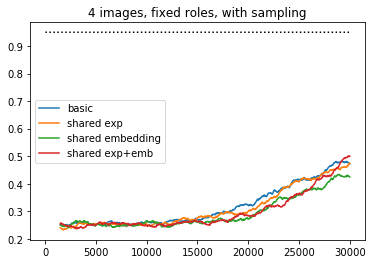

In [81]:
fnames = [
    """200914-130614-fix-4-gib-50-20
200914-131858-fix-4-gib-50-20
200914-133155-fix-4-gib-50-20
200914-134522-fix-4-gib-50-20
""",
    """200914-045855-fix-4-gib-50-20
200914-051108-fix-4-gib-50-20
200914-052331-fix-4-gib-50-20
200914-053609-fix-4-gib-50-20
""", 
    """200909-024219-fix-4-gib-50-20
200909-030311-fix-4-gib-50-20
200909-032428-fix-4-gib-50-20
200909-034654-fix-4-gib-50-20
"""
]
desc = ["basic", "shared exp", "shared embedding", "shared exp+emb"]
field = "batch_success"
goal = equivalent_success_rate(1/2, 0.95, 1/4)
fnames = list(map(format_fnames, fnames))
dfs = average_dfs(*load_many([fnames]))
only_plot(dfs, desc, field, goal=0.95, smooth_window=50)
plt.title("4 images, fixed roles, with sampling");

# Switching roles

averaging over 3 training curves


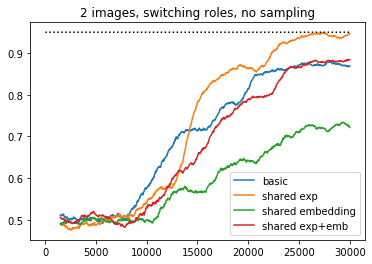

In [82]:
fnames = [
    """200914-103829-swi-2-non-50-20
200914-105145-swi-2-non-50-20
200914-110342-swi-2-non-50-20
200914-111540-swi-2-non-50-20
""",
    """200914-023547-swi-2-non-50-20
200914-024723-swi-2-non-50-20
200914-025900-swi-2-non-50-20
200914-031040-swi-2-non-50-20
""", 
    """200908-223737-swi-2-non-50-20
200908-225725-swi-2-non-50-20
200908-231708-swi-2-non-50-20
200908-233646-swi-2-non-50-20
"""
]     
desc = ["basic", "shared exp", "shared embedding", "shared exp+emb"]
field = "batch_success"
goal = 0.95
fnames = list(map(format_fnames, fnames))
dfs = average_dfs(*load_many([fnames]))
only_plot(dfs, desc, field, goal=0.95, smooth_window=50)
plt.title("2 images, switching roles, no sampling");

averaging over 3 training curves


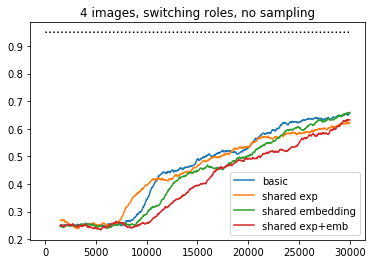

In [83]:
fnames = [
    """200914-135912-swi-4-non-50-20
200914-141255-swi-4-non-50-20
200914-142627-swi-4-non-50-20
200914-143953-swi-4-non-50-20
""",
    """200914-054859-swi-4-non-50-20
200914-060226-swi-4-non-50-20
200914-061551-swi-4-non-50-20
200914-062858-swi-4-non-50-20
""",
    """200909-040945-swi-4-non-50-20
200909-043516-swi-4-non-50-20
200909-045839-swi-4-non-50-20
200909-052152-swi-4-non-50-20
"""
]     
desc = ["basic", "shared exp", "shared embedding", "shared exp+emb"]
field = "batch_success"
goal = equivalent_success_rate(1/2, 0.95, 1/4)
fnames = list(map(format_fnames, fnames))
dfs = average_dfs(*load_many([fnames]))
only_plot(dfs, desc, field, goal=0.95, smooth_window=50)
plt.title("4 images, switching roles, no sampling");

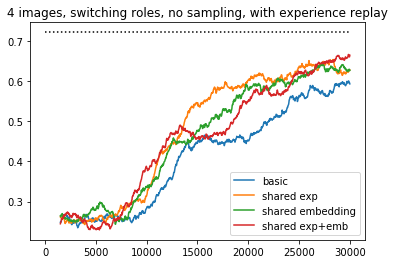

In [84]:
fnames = map(
    lambda x: "models/local_only/{}.curves.csv".format(x.strip()),
    """200910-092928-swi-4-non-50-20
    200910-094215-swi-4-non-50-20
    200910-095515-swi-4-non-50-20
    200910-100814-swi-4-non-50-20""".split("\n")
)
desc = ["basic", "shared exp", "shared embedding", "shared exp+emb"]
field = "batch_success"
goal = equivalent_success_rate(1/2, 0.95, 1/4)
plot_many(fnames, desc, field, goal, smooth_window=50)
plt.title("4 images, switching roles, no sampling, with experience replay");

## With sampling

averaging over 3 training curves


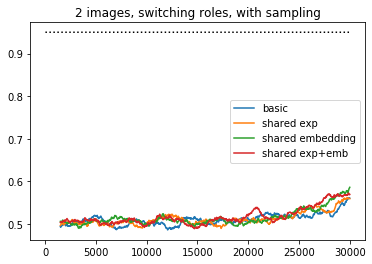

In [85]:
fnames = [
    """200914-112732-swi-2-gib-50-20
200914-113932-swi-2-gib-50-20
200914-115132-swi-2-gib-50-20
200914-120331-swi-2-gib-50-20
""",
    """200914-032217-swi-2-gib-50-20
200914-033404-swi-2-gib-50-20
200914-034552-swi-2-gib-50-20
200914-035740-swi-2-gib-50-20
""",
    """200908-235623-swi-2-gib-50-20
200909-001623-swi-2-gib-50-20
200909-003618-swi-2-gib-50-20
200909-005614-swi-2-gib-50-20
"""
]     
desc = ["basic", "shared exp", "shared embedding", "shared exp+emb"]
field = "batch_success"
goal = 0.95
fnames = list(map(format_fnames, fnames))
dfs = average_dfs(*load_many([fnames]))
only_plot(dfs, desc, field, goal=0.95, smooth_window=50)
plt.title("2 images, switching roles, with sampling");

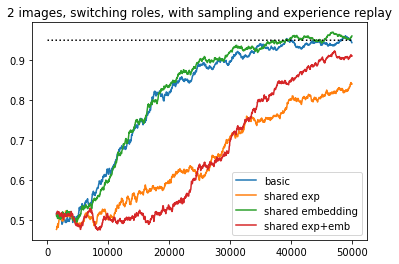

In [86]:
fnames = [
    "models/local_only/200910-012106-swi-2-gib-50-20.curves.csv",
    "models/local_only/200910-014051-swi-2-gib-50-20.curves.csv",
    "models/local_only/200910-020018-swi-2-gib-50-20.curves.csv",
    "models/local_only/200910-021951-swi-2-gib-50-20.curves.csv"
]     
desc = ["basic", "shared exp", "shared embedding", "shared exp+emb"]
field = "batch_success"
goal = 0.95
plot_many(fnames, desc, field, goal, smooth_window=50)
plt.title("2 images, switching roles, with sampling and experience replay");

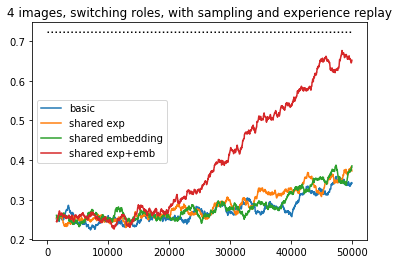

In [87]:
fnames = [
    "models/local_only/200910-023928-swi-4-gib-50-20.curves.csv",
    "models/local_only/200910-025942-swi-4-gib-50-20.curves.csv",
    "models/local_only/200910-032008-swi-4-gib-50-20.curves.csv",
    "models/local_only/200910-034031-swi-4-gib-50-20.curves.csv"
]     
desc = ["basic", "shared exp", "shared embedding", "shared exp+emb"]
field = "batch_success"
goal = equivalent_success_rate(1/2, 0.95, 1/4)
plot_many(fnames, desc, field, goal, smooth_window=50)
plt.title("4 images, switching roles, with sampling and experience replay");

averaging over 3 training curves


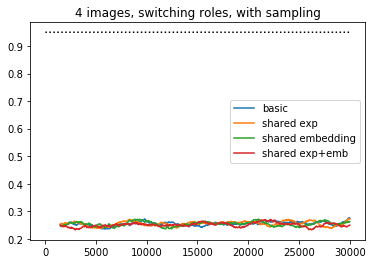

In [88]:
fnames = [
    """200914-145336-swi-4-gib-50-20
200914-150838-swi-4-gib-50-20
200914-152241-swi-4-gib-50-20
200914-153600-swi-4-gib-50-20
""",
    """200914-064202-swi-4-gib-50-20
200914-065516-swi-4-gib-50-20
200914-070830-swi-4-gib-50-20
200914-072146-swi-4-gib-50-20
""",
    """200909-054458-swi-4-gib-50-20
200909-060822-swi-4-gib-50-20
200909-063144-swi-4-gib-50-20
200909-065512-swi-4-gib-50-20
"""
]
desc = ["basic", "shared exp", "shared embedding", "shared exp+emb"]
field = "batch_success"
goal = equivalent_success_rate(1/2, 0.95, 1/4)
fnames = list(map(format_fnames, fnames))
dfs = average_dfs(*load_many([fnames]))
only_plot(dfs, desc, field, goal=0.95, smooth_window=50)
plt.title("4 images, switching roles, with sampling");